In [1]:
import numpy as np
import pandas as pd

import plotly.express as pxa
import seaborn as sns
import matplotlib.pyplot as plt

# choose seaborn style option
sns.set(style="darkgrid")

# choose a matplotlib style option
plt.style.use('seaborn-v0_8-bright')

import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
pip install bar_chart_race

In [3]:
import bar_chart_race as bcr
from IPython.display import Image, display

In [4]:
bcr.__version__

'0.1.0'

In [5]:
df = pd.read_csv('dataset.csv')

In [6]:
df.head()

VIN (1-10)     County      City State  Postal Code  Model Year       Make  \
0  JTMEB3FV6N     Monroe  Key West    FL        33040        2022     TOYOTA   
1  1G1RD6E45D      Clark  Laughlin    NV        89029        2013  CHEVROLET   
2  JN1AZ0CP8B     Yakima    Yakima    WA        98901        2011     NISSAN   
3  1G1FW6S08H     Skagit  Concrete    WA        98237        2017  CHEVROLET   
4  3FA6P0SU1K  Snohomish   Everett    WA        98201        2019       FORD   

        Model                   Electric Vehicle Type  \
0  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
2        LEAF          Battery Electric Vehicle (BEV)   
3     BOLT EV          Battery Electric Vehicle (BEV)   
4      FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible              42   
1           Clean Alternative Fuel Vehicle Eligible              38   
2           Clean Alternative Fuel Vehicle Eligible              73   
3           Clean Alternative Fuel Vehicle Eligible             238   
4             Not eligible due to low battery range              26   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                   NaN       198968248   
1          0                   NaN         5204412   
2          0                  15.0       218972519   
3          0                  39.0       186750406   
4          0                  38.0         2006714   

              Vehicle Location        Electric Utility  2020 Census Tract  
0    POINT (-81.80023 24.5545)                     NaN        12087972100  
1  POINT (-114.57245 35.16815)                     NaN        32003005702  
2  POINT (-120.50721 46.60448)              PACIFICORP        53077001602  
3   POINT (-121.7515 48.53892)  PUGET SOUND ENERGY INC        53057951101  
4  POINT (-122.20596 47.97659)  PUGET SOUND ENERGY INC        53061041500

In [7]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [8]:
df.columns = df.columns.str.replace(" ","_")

In [9]:
df.columns = df.columns.str.strip().str.lower()

In [10]:
df.head()

vin_(1-10)     county      city state  postal_code  model_year       make  \
0  JTMEB3FV6N     Monroe  Key West    FL        33040        2022     TOYOTA   
1  1G1RD6E45D      Clark  Laughlin    NV        89029        2013  CHEVROLET   
2  JN1AZ0CP8B     Yakima    Yakima    WA        98901        2011     NISSAN   
3  1G1FW6S08H     Skagit  Concrete    WA        98237        2017  CHEVROLET   
4  3FA6P0SU1K  Snohomish   Everett    WA        98201        2019       FORD   

        model                   electric_vehicle_type  \
0  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
2        LEAF          Battery Electric Vehicle (BEV)   
3     BOLT EV          Battery Electric Vehicle (BEV)   
4      FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   

  clean_alternative_fuel_vehicle_(cafv)_eligibility  electric_range  \
0           Clean Alternative Fuel Vehicle Eligible              42   
1           Clean Alternative Fuel Vehicle Eligible              38   
2           Clean Alternative Fuel Vehicle Eligible              73   
3           Clean Alternative Fuel Vehicle Eligible             238   
4             Not eligible due to low battery range              26   

   base_msrp  legislative_district  dol_vehicle_id  \
0          0                   NaN       198968248   
1          0                   NaN         5204412   
2          0                  15.0       218972519   
3          0                  39.0       186750406   
4          0                  38.0         2006714   

              vehicle_location        electric_utility  2020_census_tract  
0    POINT (-81.80023 24.5545)                     NaN        12087972100  
1  POINT (-114.57245 35.16815)                     NaN        32003005702  
2  POINT (-120.50721 46.60448)              PACIFICORP        53077001602  
3   POINT (-121.7515 48.53892)  PUGET SOUND ENERGY INC        53057951101  
4  POINT (-122.20596 47.97659)  PUGET SOUND ENERGY INC        53061041500

In [11]:
df.shape

(112634, 17)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   vin_(1-10)                                         112634 non-null  object 
 1   county                                             112634 non-null  object 
 2   city                                               112634 non-null  object 
 3   state                                              112634 non-null  object 
 4   postal_code                                        112634 non-null  int64  
 5   model_year                                         112634 non-null  int64  
 6   make                                               112634 non-null  object 
 7   model                                              112614 non-null  object 
 8   electric_vehicle_type                              112634 non-null  object

In [13]:
# cheecking missing values
df.isna().sum()

vin_(1-10)                                             0
county                                                 0
city                                                   0
state                                                  0
postal_code                                            0
model_year                                             0
make                                                   0
model                                                 20
electric_vehicle_type                                  0
clean_alternative_fuel_vehicle_(cafv)_eligibility      0
electric_range                                         0
base_msrp                                              0
legislative_district                                 286
dol_vehicle_id                                         0
vehicle_location                                      24
electric_utility                                     443
2020_census_tract                                      0
dtype: int64

In [14]:
df.model.value_counts().reset_index().head()

model  count
0  MODEL 3  23135
1  MODEL Y  17142
2     LEAF  12880
3  MODEL S   7377
4  BOLT EV   4910

In [15]:
df.legislative_district.value_counts()[:3].reset_index().head()

legislative_district  count
0                  41.0   7605
1                  45.0   7112
2                  48.0   6462
3                  36.0   5251
4                  46.0   4723

In [16]:
df.vehicle_location.value_counts().reset_index().head()

vehicle_location  count
0  POINT (-122.13158 47.67858)   2916
1   POINT (-122.2066 47.67887)   2059
2   POINT (-122.1872 47.61001)   2001
3  POINT (-122.31765 47.70013)   1880
4  POINT (-122.12096 47.55584)   1852

In [17]:
df.electric_utility.value_counts().reset_index().head()

electric_utility  count
0      PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)  40247
1                             PUGET SOUND ENERGY INC  22172
2       CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)  21447
3  BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...   6522
4  BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...   5053

In [18]:
# handle Missing values : Impute missing values using
df.model = df.model.fillna(df.model.mode()[0])
df.legislative_district = df.legislative_district.fillna(df.legislative_district.mean())
df.vehicle_location = df.vehicle_location.fillna(df.vehicle_location.mode()[0])
df.electric_utility = df.electric_utility.fillna(df.electric_utility.mode()[0])

In [19]:
df.isna().sum()

vin_(1-10)                                           0
county                                               0
city                                                 0
state                                                0
postal_code                                          0
model_year                                           0
make                                                 0
model                                                0
electric_vehicle_type                                0
clean_alternative_fuel_vehicle_(cafv)_eligibility    0
electric_range                                       0
base_msrp                                            0
legislative_district                                 0
dol_vehicle_id                                       0
vehicle_location                                     0
electric_utility                                     0
2020_census_tract                                    0
dtype: int64

In [20]:
pd.options.display.float_format = '{:.0f}'.format
df.describe().transpose()

count        mean        std        min         25%  \
postal_code          112634       98156       2649       1730       98052   
model_year           112634        2019          3       1997        2017   
electric_range       112634          88        102          0           0   
base_msrp            112634        1793      10784          0           0   
legislative_district 112634          30         15          1          18   
dol_vehicle_id       112634   199456680   93984270       4777   148414150   
2020_census_tract    112634 52966495754 1699104500 1101001400 53033008500   

                             50%         75%         max  
postal_code                98119       98370       99701  
model_year                  2020        2022        2023  
electric_range                32         208         337  
base_msrp                      0           0      845000  
legislative_district          34          43          49  
dol_vehicle_id         192389624   219189880   479254772  
2020_census_tract    53033029305 53053072506 56033000100

### **UNIVARIATE ANALYSIS**

<Axes: xlabel='electric_range', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Electric Range')

Text(0.5, 0, 'Electric Range (Miles)')

Text(0, 0.5, 'Frequency')

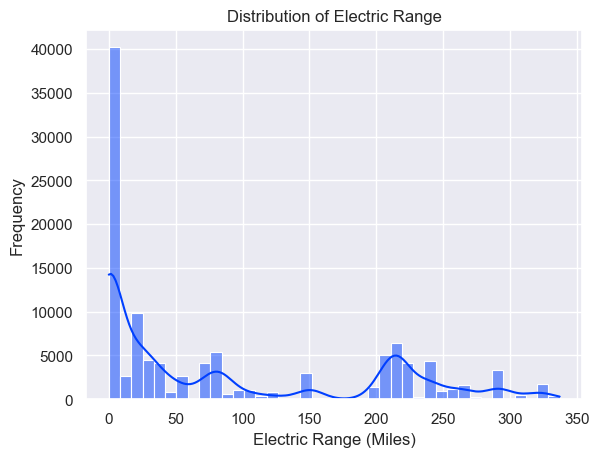

In [21]:
sns.histplot(x = df.electric_range,kde = True)
plt.title("Distribution of Electric Range")
plt.xlabel("Electric Range (Miles)")
plt.ylabel("Frequency")
plt.show()

<Axes: xlabel='legislative_district', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of legislative_district')

Text(0.5, 0, 'legislative_district')

Text(0, 0.5, 'Frequency')

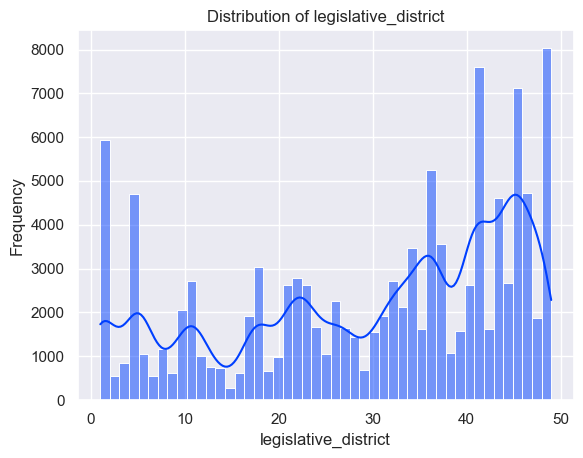

In [22]:
sns.histplot(x = df.legislative_district,kde = True)
plt.title("Distribution of legislative_district")
plt.xlabel("legislative_district")
plt.ylabel("Frequency")
plt.show()

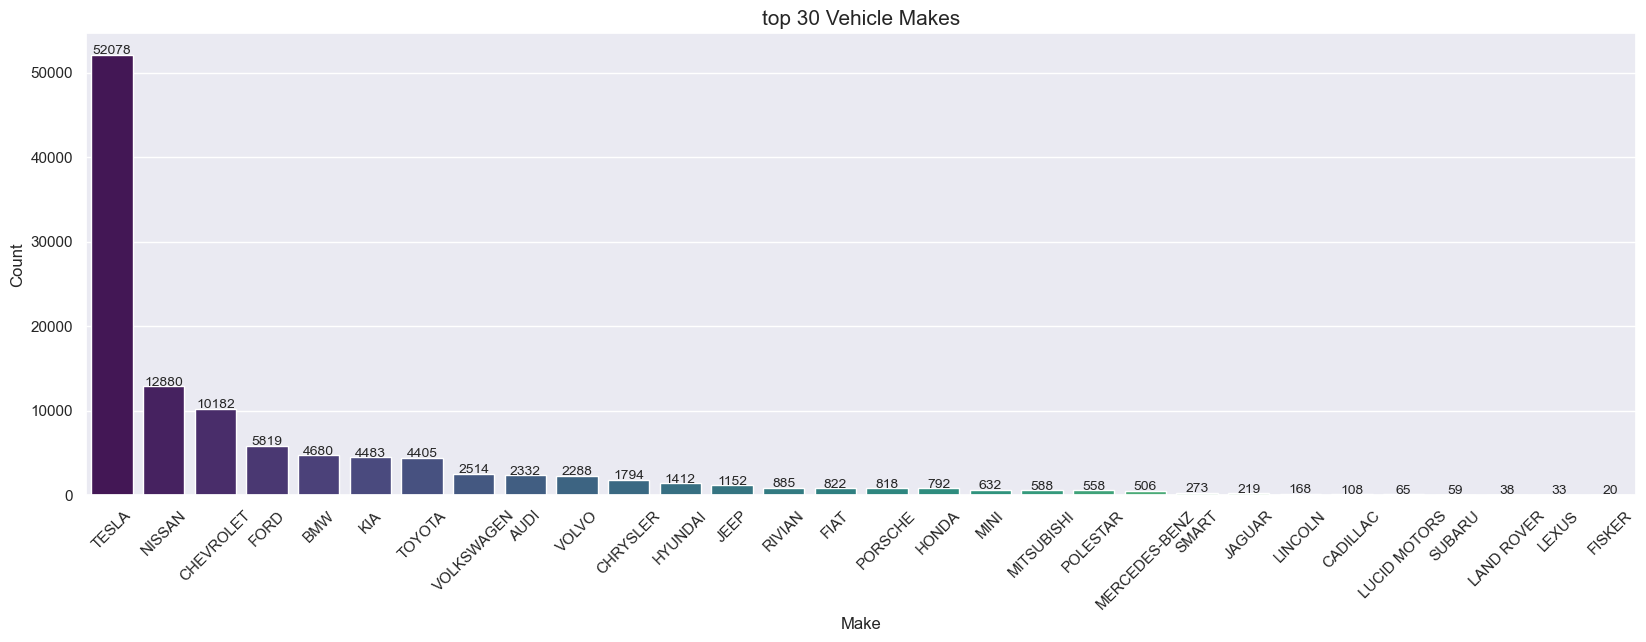

In [23]:
plt.figure(figsize = (20,6))
top_makes = df['make'].value_counts().nlargest(30)
sns.barplot(x = top_makes.index, y = top_makes.values, palette = "viridis")

# Adding data labels on top of bars
for index, value in enumerate(top_makes.values):
    plt.text(index,value + 100, str(value), ha = "center", fontsize = 10)
plt.title("top 30 Vehicle Makes" ,fontsize = 15)
plt.xlabel("Make",fontsize = 12)
plt.ylabel("Count",fontsize = 12)
plt.xticks(rotation = 45)
plt.show();

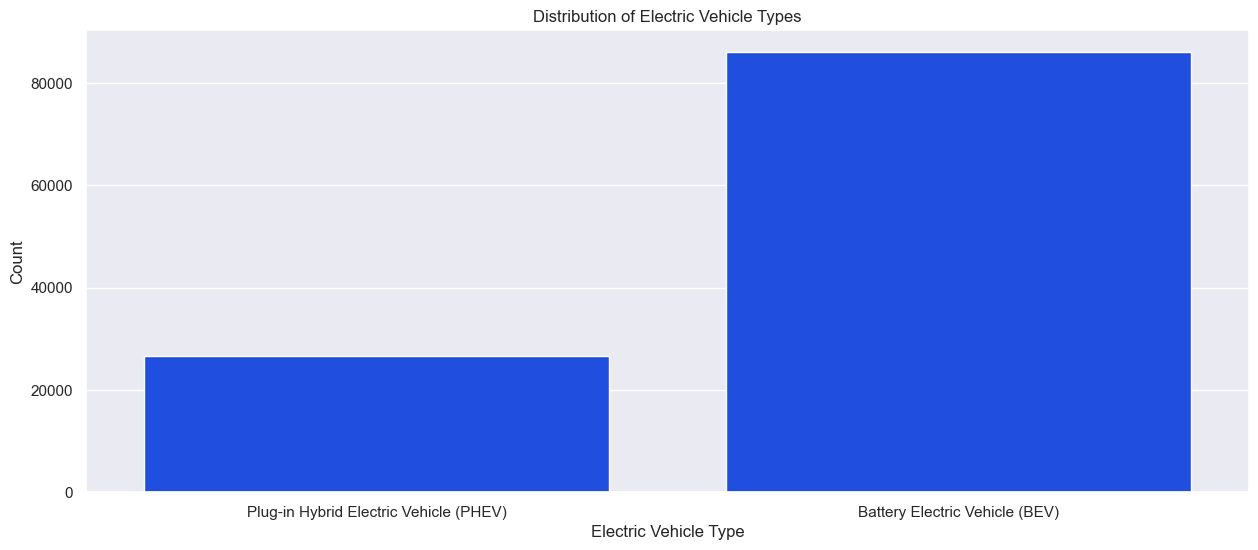

In [24]:
plt.figure(figsize = (15,6))
sns.countplot(x = "electric_vehicle_type",data = df)
plt.title("Distribution of Electric Vehicle Types")
plt.xlabel("Electric Vehicle Type")
plt.ylabel('Count')
plt.show();

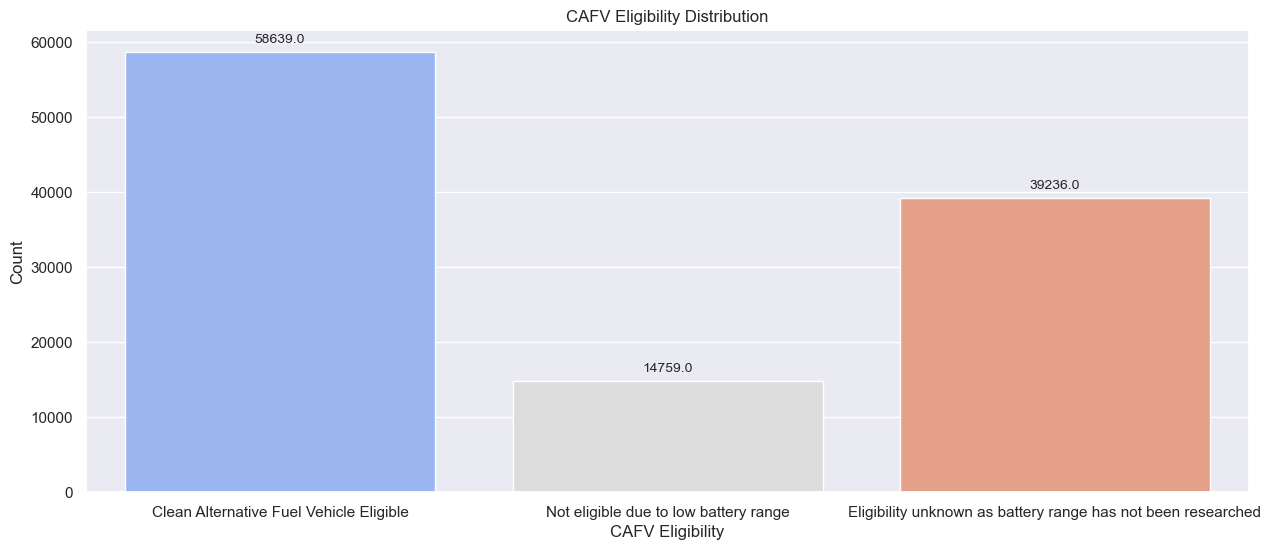

In [25]:
plt.figure(figsize = (15,6))
ax = sns.countplot(x = 'clean_alternative_fuel_vehicle_(cafv)_eligibility',data = df,palette = "coolwarm")

# Adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',(p.get_x() + p.get_width() / 2.,p.get_height()),
               ha = "center",va = "center",xytext = (0,9),textcoords = "offset points", fontsize = 10)
plt.title("CAFV Eligibility Distribution",)
plt.xlabel("CAFV Eligibility",fontsize = 12)
plt.ylabel('Count',fontsize = 12)
plt.show();

### BIVARIATE ANALYSIS

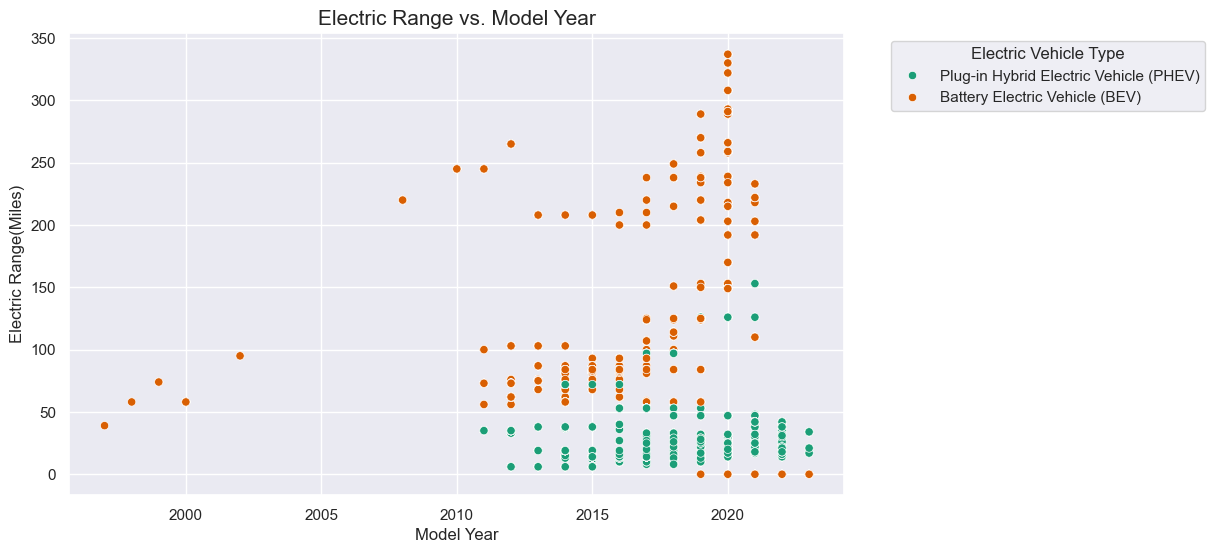

In [26]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'model_year',y = 'electric_range',data = df,hue = 'electric_vehicle_type',palette = 'Dark2')
plt.title("Electric Range vs. Model Year",fontsize  = 15)
plt.xlabel("Model Year",fontsize  = 12)
plt.ylabel("Electric Range(Miles)", fontsize = 12)
plt.legend(title = "Electric Vehicle Type",bbox_to_anchor = (1.05,1),loc = 'upper left')
plt.show();

In [27]:
df.columns

Index(['vin_(1-10)', 'county', 'city', 'state', 'postal_code', 'model_year',
       'make', 'model', 'electric_vehicle_type',
       'clean_alternative_fuel_vehicle_(cafv)_eligibility', 'electric_range',
       'base_msrp', 'legislative_district', 'dol_vehicle_id',
       'vehicle_location', 'electric_utility', '2020_census_tract'],
      dtype='object')

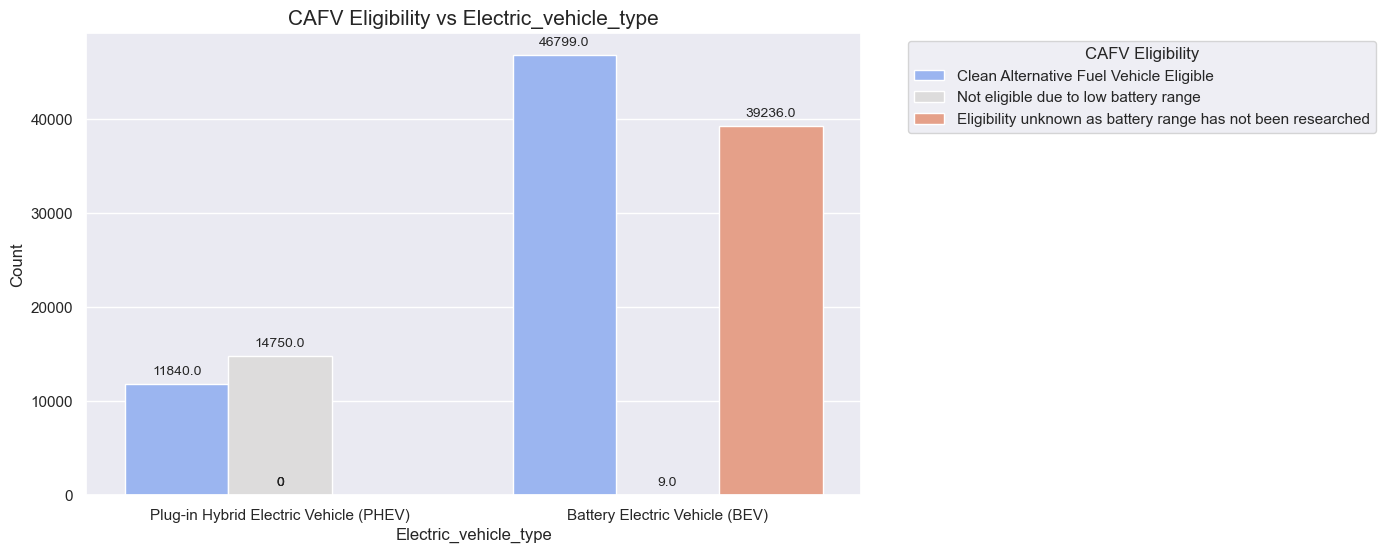

In [28]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x = 'electric_vehicle_type',hue = "clean_alternative_fuel_vehicle_(cafv)_eligibility",data = df,palette = "coolwarm")

# Adding data labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',(p.get_x() + p.get_width() / 2.,height),
               ha = "center",va = "center",xytext = (0,9),textcoords = "offset points", fontsize = 10)
plt.title("CAFV Eligibility vs Electric_vehicle_type",fontsize = 15)
plt.xlabel("Electric_vehicle_type",fontsize = 12)
plt.ylabel('Count',fontsize = 12)
plt.legend(title = "CAFV Eligibility",bbox_to_anchor = (1.05,1),loc = 'upper left')
plt.show();

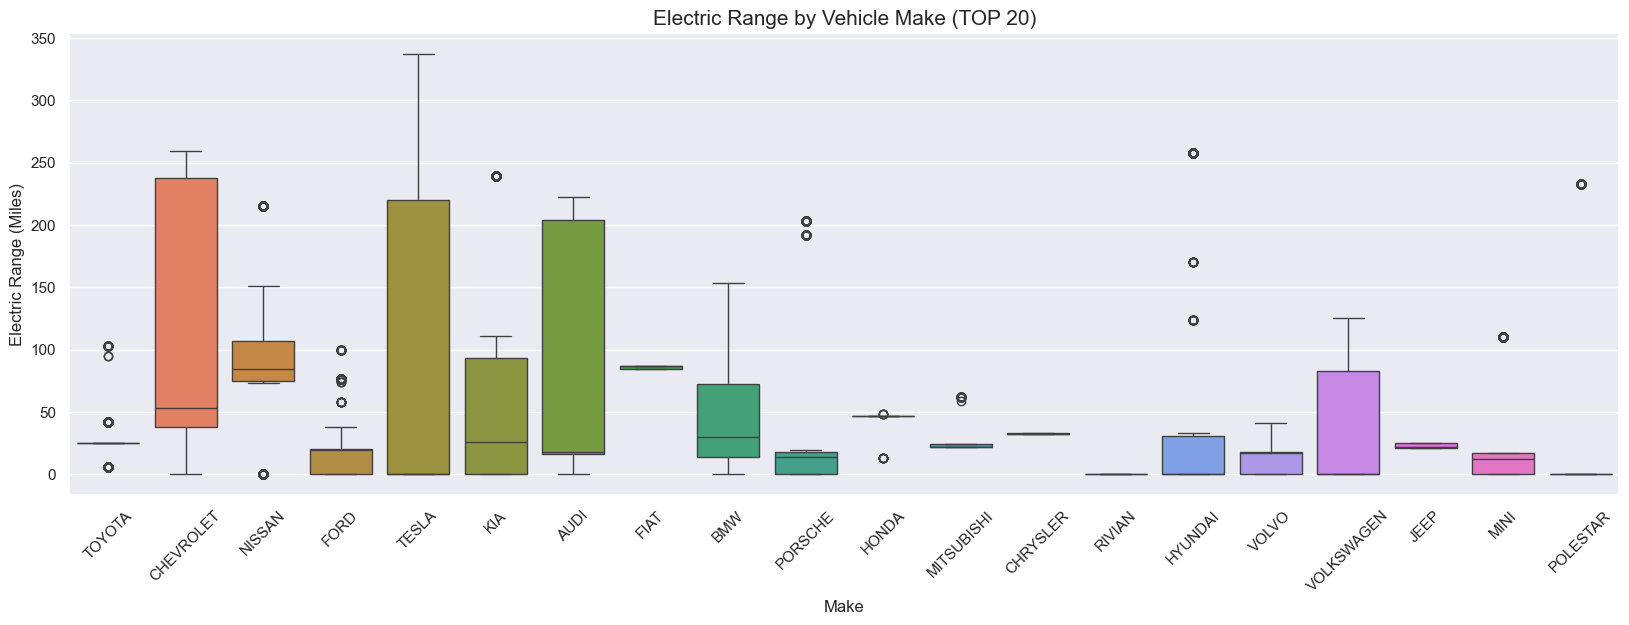

In [29]:
plt.figure(figsize = (20,6))
top_makes = df['make'].value_counts().nlargest(20).index
ax = sns.boxplot(x = 'make', y = 'electric_range',data = df[df['make'].isin(top_makes)], palette = "husl")

plt.title("Electric Range by Vehicle Make (TOP 20)" ,fontsize = 15)
plt.xlabel("Make",fontsize = 12)
plt.ylabel("Electric Range (Miles)",fontsize = 12)
plt.xticks(rotation = 45)

# Add median data labels on top of boxes
for i, box in enumerate(ax.artists):
    y = box.get_ydata()
    median = rounf(data[data['make'] == top_makes[i]]['electric_range'].median(), 2)
    plt.text(i,median + 10, f'{median}',ha = "center",fontsize = 10)
plt.show();

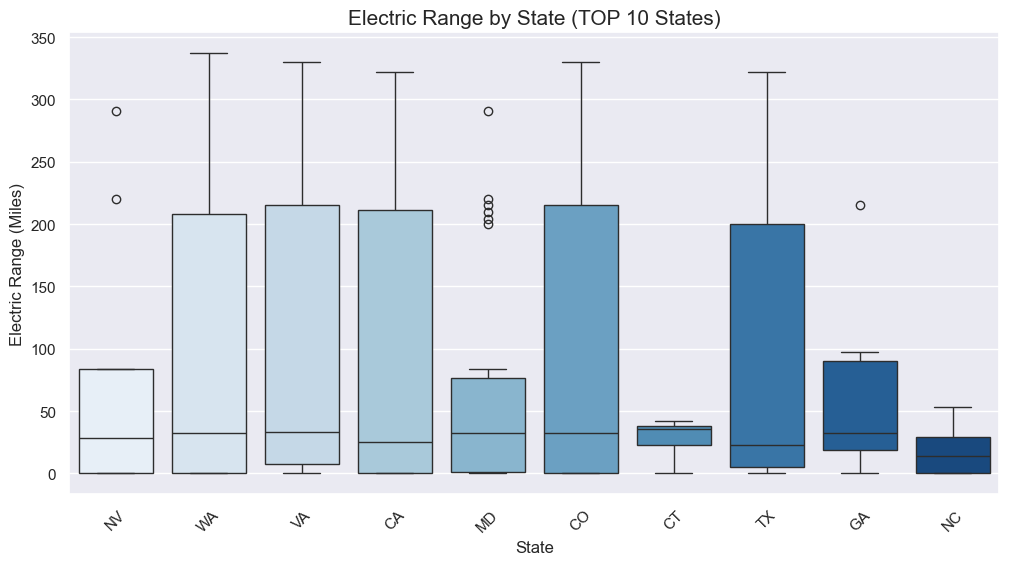

In [30]:
plt.figure(figsize = (12,6))
top_states = df['state'].value_counts().nlargest(10).index
ax = sns.boxplot(x = 'state', y = 'electric_range',data = df[df['state'].isin(top_states)], palette = "Blues")

plt.title("Electric Range by State (TOP 10 States)" ,fontsize = 15)
plt.xlabel("State",fontsize = 12)
plt.ylabel("Electric Range (Miles)",fontsize = 12)
plt.xticks(rotation = 45)

# Add median data labels on top of boxes
for i, box in enumerate(ax.artists):
    y = box.get_ydata()
    median = round(df[df['state'] == top_states[i]]['electric_range'].median(), 2)
    plt.text(i,median + 10, f'{median}',ha = "center",fontsize = 10)
plt.show();

### TASK 2 : CREATE A CHOROPLETH USING PLOTLY.EXPRESS TO DISPLAY THE NUMBER OF EV VEHICLES BASED ON LOCATION

In [31]:
import pandas as pd
import plotly.express as px

In [32]:
#Group data by "state" and count the number of electric vehicles per state
ev_count_by_state = df.groupby("state").size().reset_index(name = "ev_count")

In [33]:
ev_count_by_state

state  ev_count
0     AK         1
1     AL         1
2     AR         4
3     AZ         6
4     CA        76
5     CO         9
6     CT         6
7     DC         6
8     DE         1
9     FL         6
10    GA         7
11    HI         4
12    ID         2
13    IL         6
14    KS         3
15    KY         1
16    LA         3
17    MA         3
18    MD        26
19    ME         1
20    MN         1
21    MO         3
22    MS         1
23    NC         7
24    ND         1
25    NE         5
26    NH         2
27    NJ         3
28    NM         1
29    NV         8
30    NY         4
31    OH         2
32    OK         1
33    OR         5
34    PA         3
35    RI         1
36    SC         5
37    SD         1
38    TN         3
39    TX        14
40    UT         4
41    VA        36
42    WA    112348
43    WI         1
44    WY         2

In [34]:
#create a choropleth map
fig = px.choropleth(
    ev_count_by_state,
    locations = "state", # column representing state code (like "WA","FL",etc.)
    locationmode = "USA-states", # This maps "state" to U.S states
    color ="ev_count", # color by the count of electric vehicles
    color_continuous_scale = "Blues",
    scope = "usa" , # restrict map to the USA
    labels = {"ev_count" : "Number of EVs"},# Label for the color legend
    title = "Number of Electric Vehicles by state"
)

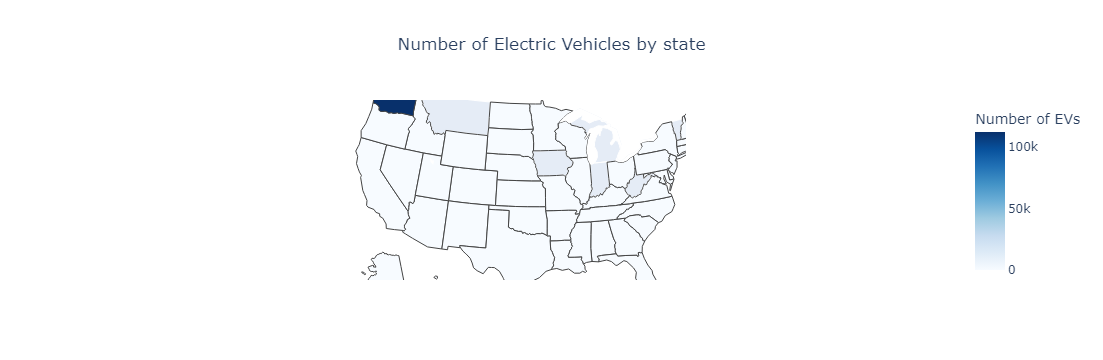

In [35]:
# update the layout for better visualization 
fig.update_layout(
    geo = dict(bgcolor = "rgba(0,0,0,0)"),
    title_x = 0.5
)
# Display the map
fig.show();

### TASK3 : Create a racing bar plot to display the animation of EV Make and its count each year

In [36]:
pip install --upgrade bar_chart_race

Note: you may need to restart the kernel to use updated packages.


In [37]:
import bar_chart_race as bcr

In [39]:
# creating dataframe for bcr
df1 = df.groupby(['model_year','make']).size().unstack(fill_value = 0)
df2 =  df.groupby(['model_year','make']).size().unstack(fill_value = 0).reset_index()
df2.head()

make  model_year  AUDI  AZURE DYNAMICS  BENTLEY  BMW  CADILLAC  CHEVROLET  \
0           1997     0               0        0    0         0          1   
1           1998     0               0        0    0         0          0   
2           1999     0               0        0    0         0          0   
3           2000     0               0        0    0         0          0   
4           2002     0               0        0    0         0          0   

make  CHRYSLER  FIAT  FISKER  ...  POLESTAR  PORSCHE  RIVIAN  SMART  SUBARU  \
0            0     0       0  ...         0        0       0      0       0   
1            0     0       0  ...         0        0       0      0       0   
2            0     0       0  ...         0        0       0      0       0   
3            0     0       0  ...         0        0       0      0       0   
4            0     0       0  ...         0        0       0      0       0   

make  TESLA  TH!NK  TOYOTA  VOLKSWAGEN  VOLVO  
0         0      0       0           0      0  
1         0      0       0           0      0  
2         0      0       0           0      0  
3         0      0       0           0      0  
4         0      0       2           0      0  

[5 rows x 35 columns]

MovieWriter imagemagick unavailable; using Pillow instead.


Racing bar plot


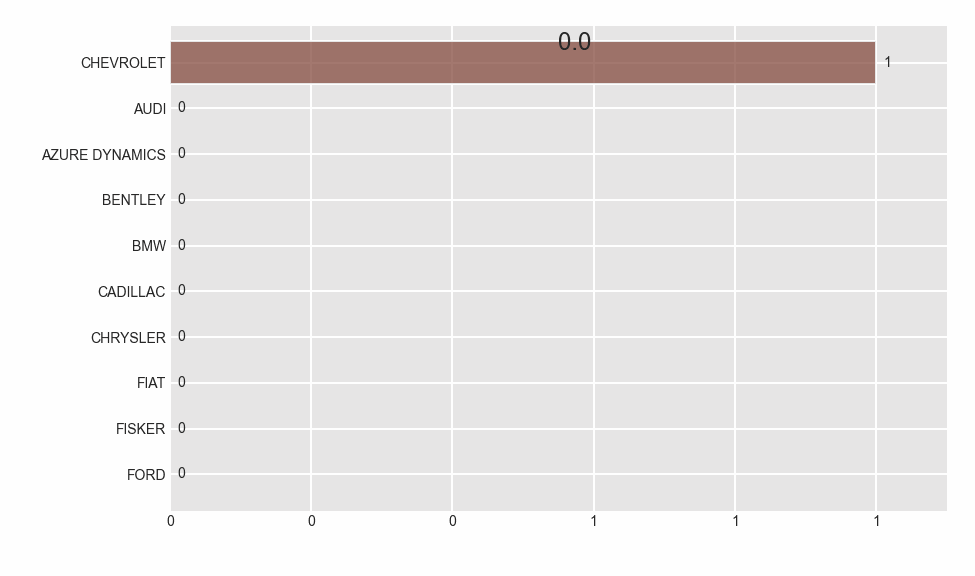

In [40]:
bcr.bar_chart_race(
    df = df2.loc[:,'AUDI':'VOLVO'],
    filename = 'ev_racing_bar_chart.gif',
    cmap = 'tab10',
    sort='desc',
    period_label={'x':0.5,'y':0.95},
    n_bars=10,
    period_length=1000,
    bar_label_size=7,
    tick_label_size=7,
    figsize=(6,4),
    label_bars = True,
    #period_label = True
)
print('Racing bar plot')
from IPython.display import Image
Image(filename = 'ev_racing_bar_chart.gif')

### **CONCLUSION FROM THE ANALYSIS**

+ **Electric Range Distribution :** **The Analysis of electric ranges shows most Vehicles fall with in a typical range , with a few outliers having very high or low Ranges. This may indicate a standarization of battery capacities in the market .**
+ **Legislative Districts : The spread of Vehicles across various legislative districts suggests areas where infrastructure for electric vehicles 
(like charging) might need to be improved or is already well-established**


### **Over All Analysis**

+ **This Analysis highlights key trends in the electric vehicles , in terms of performance (electric range). The Visualizations , particually the bar chart
 race , provide a dynamic view of how manufactures are completing over time , while the histograms give a deeper understanding of the data distribution.**
+ **This Information can be used by policymakers and manufactures to targetareas for improvement , such as increasing the electric vehicle range or 
expanding infrastructures in underserved locations**